In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
# Load data
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

In [4]:
# Data preprocessing
trainX = train_data.drop(columns=["label"]).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
trainY = tf.keras.utils.to_categorical(train_data["label"].values)
testX = test_data.drop(columns=["label"]).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
testY = tf.keras.utils.to_categorical(test_data["label"].values)

In [5]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

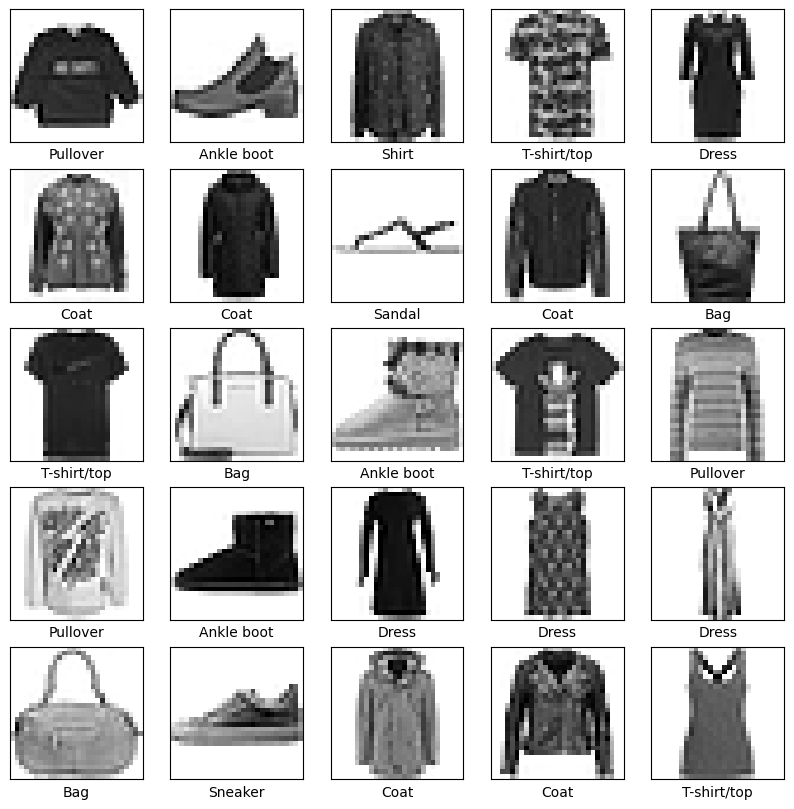

In [6]:
# Visualize data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[tf.argmax(trainY[i])])
plt.show()

In [7]:

# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Input layer with input shape
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='conv_layer_1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling_layer_1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv_layer_2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling_layer_2'),
    tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")
])


In [8]:
# Compilation and training
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(trainX, trainY, epochs=5, validation_data=(testX, testY))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.4303 - loss: 1.5789 - val_accuracy: 0.7212 - val_loss: 0.8507
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7067 - loss: 0.8382 - val_accuracy: 0.7497 - val_loss: 0.7483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7419 - loss: 0.7447 - val_accuracy: 0.7541 - val_loss: 0.6914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7588 - loss: 0.6951 - val_accuracy: 0.7660 - val_loss: 0.6636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7745 - loss: 0.6591 - val_accuracy: 0.7618 - val_loss: 0.6448


In [10]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_layer_1 (AveragePooling2D)   │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_layer_2 (AveragePooling2D)   │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_avg_pooling_layer             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

In [11]:
# Evaluation
loss, accuracy = model.evaluate(testX, testY)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7578 - loss: 0.6536
Test Loss: 0.6447780728340149
Test Accuracy: 0.7617999911308289


In [12]:
# Prediction and Evaluation Metrics
predictions = model.predict(testX)
predictions = tf.argmax(predictions, axis=1)
y_true = tf.argmax(testY, axis=1)

accuracy_score = metrics.accuracy_score(y_true, predictions)
classification_report = metrics.classification_report(y_true, predictions)
print("Accuracy Score:", accuracy_score)
print("Classification Report:\n", classification_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy Score: 0.7618
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.51      0.82      0.63      1000
           3       0.66      0.89      0.76      1000
           4       0.70      0.44      0.54      1000
           5       0.90      0.90      0.90      1000
           6       0.62      0.24      0.35      1000
           7       0.78      0.94      0.85      1000
           8       0.94      0.90      0.92      1000
           9       0.94      0.76      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



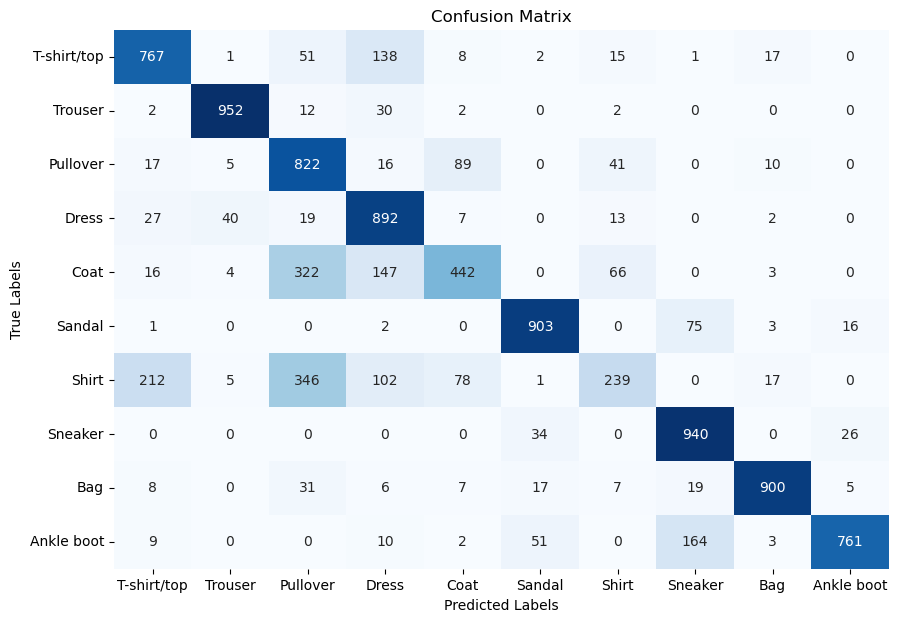

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true, predictions, and class_names

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()